# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 583


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
base_url = "https://api.openweathermap.org/data/2.5/weather?q={}&appid={}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | camana
Processing Record 2 of Set 1 | karratha
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | ryotsu-minato
Processing Record 7 of Set 1 | hayma'
City not found. Skipping...
Processing Record 8 of Set 1 | kargopol'
Processing Record 9 of Set 1 | invercargill
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | hawaiian paradise park
Processing Record 12 of Set 1 | gadzhiyevo
Processing Record 13 of Set 1 | bethel
Processing Record 14 of Set 1 | talavera la real
Processing Record 15 of Set 1 | bilibino
Processing Record 16 of Set 1 | tiksi
Processing Record 17 of Set 1 | fale old settlement
Processing Record 18 of Set 1 | antalaha
Processing Record 19 of Set 1 | alofi
Processing Record 20 of Set 1 | utrik
Processing Record 21 of Set 1 | ilulissat
Processing Record 

Processing Record 35 of Set 4 | santa maria
Processing Record 36 of Set 4 | hadibu
Processing Record 37 of Set 4 | plettenberg bay
Processing Record 38 of Set 4 | sambhal
Processing Record 39 of Set 4 | zhezqazghan
Processing Record 40 of Set 4 | ushuaia
Processing Record 41 of Set 4 | saint-pierre
Processing Record 42 of Set 4 | aykhal
Processing Record 43 of Set 4 | sao joao da barra
Processing Record 44 of Set 4 | touros
Processing Record 45 of Set 4 | tabuk
Processing Record 46 of Set 4 | ola
Processing Record 47 of Set 4 | ulsteinvik
Processing Record 48 of Set 4 | brookings
Processing Record 49 of Set 4 | saldanha
Processing Record 0 of Set 5 | bredasdorp
Processing Record 1 of Set 5 | hilo
Processing Record 2 of Set 5 | valongo
Processing Record 3 of Set 5 | ancud
Processing Record 4 of Set 5 | north bend
Processing Record 5 of Set 5 | viransehir
Processing Record 6 of Set 5 | talnakh
Processing Record 7 of Set 5 | santa ana de yacuma
Processing Record 8 of Set 5 | talcahuano
Pr

Processing Record 31 of Set 8 | westerland
Processing Record 32 of Set 8 | meulaboh
Processing Record 33 of Set 8 | remire-montjoly
Processing Record 34 of Set 8 | carutapera
Processing Record 35 of Set 8 | grootfontein
Processing Record 36 of Set 8 | broken hill
Processing Record 37 of Set 8 | norfolk county
Processing Record 38 of Set 8 | monte alegre
Processing Record 39 of Set 8 | santana
Processing Record 40 of Set 8 | dossor
Processing Record 41 of Set 8 | kete krachi
Processing Record 42 of Set 8 | port de pollenca
Processing Record 43 of Set 8 | bengkulu
Processing Record 44 of Set 8 | akureyri
Processing Record 45 of Set 8 | george town
Processing Record 46 of Set 8 | nelson bay
Processing Record 47 of Set 8 | maracas
Processing Record 48 of Set 8 | dzerzhinskoye
Processing Record 49 of Set 8 | kerikeri
Processing Record 0 of Set 9 | fada n'gourma
Processing Record 1 of Set 9 | saint-philippe
Processing Record 2 of Set 9 | uaua
Processing Record 3 of Set 9 | marsh harbour
Proc

Processing Record 19 of Set 12 | naifaru
Processing Record 20 of Set 12 | kuanda
Processing Record 21 of Set 12 | el calafate
Processing Record 22 of Set 12 | lembar
City not found. Skipping...
Processing Record 23 of Set 12 | steinau an der strasse
Processing Record 24 of Set 12 | la sarre
Processing Record 25 of Set 12 | linxia chengguanzhen
Processing Record 26 of Set 12 | shenjiamen
Processing Record 27 of Set 12 | pio xii
Processing Record 28 of Set 12 | taunggyi
Processing Record 29 of Set 12 | belyy yar
Processing Record 30 of Set 12 | paraisopolis
Processing Record 31 of Set 12 | waimea
Processing Record 32 of Set 12 | yangi qal'ah
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
test_url = f"https://api.openweathermap.org/data/2.5/weather?q=London&appid={weather_api_key}"
response = requests.get(test_url).json()
print(response)

{'coord': {'lon': -0.1257, 'lat': 51.5085}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 282.77, 'feels_like': 281.85, 'temp_min': 280.58, 'temp_max': 284.35, 'pressure': 994, 'humidity': 93}, 'visibility': 10000, 'wind': {'speed': 2.06, 'deg': 230}, 'clouds': {'all': 10}, 'dt': 1698641736, 'sys': {'type': 2, 'id': 2006068, 'country': 'GB', 'sunrise': 1698648577, 'sunset': 1698683914}, 'timezone': 0, 'id': 2643743, 'name': 'London', 'cod': 200}


In [5]:
response = requests.get(city_url)
print(response.json())

{'coord': {'lon': 69.6113, 'lat': 37.4657}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 298.25, 'feels_like': 297.39, 'temp_min': 298.25, 'temp_max': 298.25, 'pressure': 1018, 'humidity': 22, 'sea_level': 1018, 'grnd_level': 965}, 'visibility': 10000, 'wind': {'speed': 1.08, 'deg': 338, 'gust': 0.97}, 'clouds': {'all': 10}, 'dt': 1698642254, 'sys': {'country': 'AF', 'sunrise': 1698630213, 'sunset': 1698668805}, 'timezone': 16200, 'id': 1121271, 'name': 'Yangī Qal‘ah', 'cod': 200}


In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,camana,-16.6228,-72.7111,291.96,89,69,3.87,PE,1698641780
1,karratha,-20.7377,116.8463,306.85,32,89,5.52,AU,1698641781
2,adamstown,-25.0660,-130.1015,295.83,82,100,4.12,PN,1698641782
3,waitangi,-43.9535,-176.5597,286.38,76,66,1.79,NZ,1698641783
4,grytviken,-54.2811,-36.5092,276.88,99,100,4.31,GS,1698641783


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,camana,-16.6228,-72.7111,291.96,89,69,3.87,PE,1698641780
1,karratha,-20.7377,116.8463,306.85,32,89,5.52,AU,1698641781
2,adamstown,-25.0660,-130.1015,295.83,82,100,4.12,PN,1698641782
3,waitangi,-43.9535,-176.5597,286.38,76,66,1.79,NZ,1698641783
4,grytviken,-54.2811,-36.5092,276.88,99,100,4.31,GS,1698641783


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

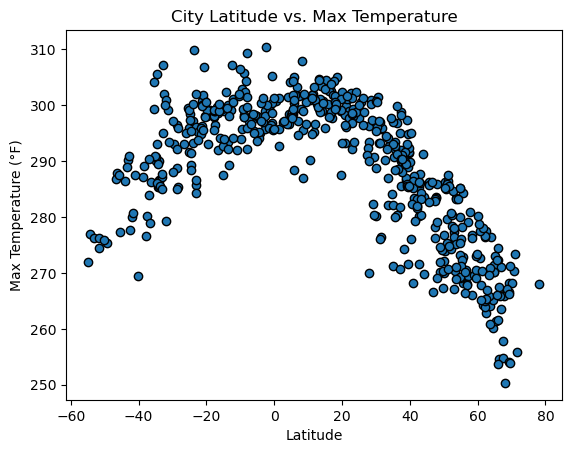

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black")
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

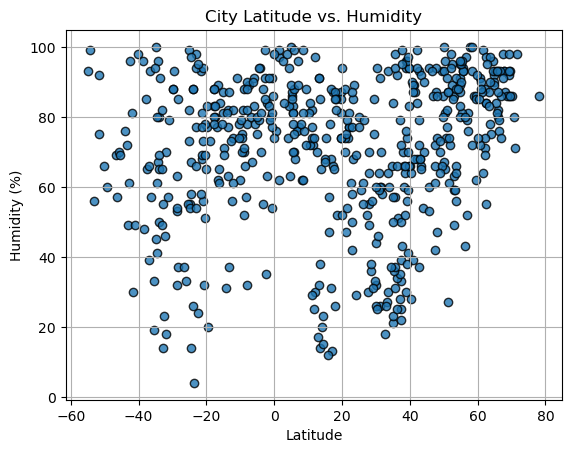

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

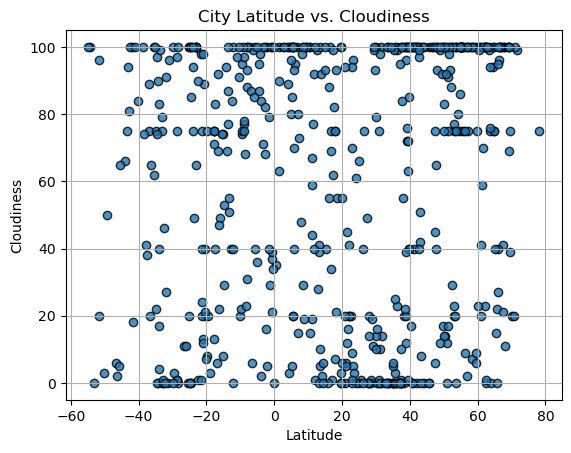

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

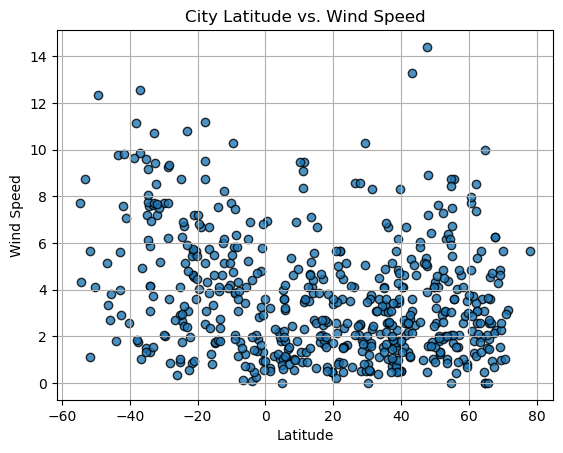

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    (slope, intercept, rvalue, _, _) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.annotate(f"y = {round(slope,2)}x + {round(intercept,2)}", text_coordinates, fontsize=14, color="red")

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,ryotsu-minato,38.0833,138.4333,289.18,70,55,1.56,JP,1698641784
6,kargopol',61.5071,38.9456,264.29,99,70,1.30,RU,1698641786
9,hawaiian paradise park,19.5933,-154.9731,298.88,87,100,0.45,US,1698641788
10,gadzhiyevo,69.2551,33.3362,266.61,92,100,4.83,RU,1698641789
11,bethel,41.3712,-73.4140,283.35,89,100,2.06,US,1698641790


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,camana,-16.6228,-72.7111,291.96,89,69,3.87,PE,1698641780
1,karratha,-20.7377,116.8463,306.85,32,89,5.52,AU,1698641781
2,adamstown,-25.0660,-130.1015,295.83,82,100,4.12,PN,1698641782
3,waitangi,-43.9535,-176.5597,286.38,76,66,1.79,NZ,1698641783
4,grytviken,-54.2811,-36.5092,276.88,99,100,4.31,GS,1698641783


###  Temperature vs. Latitude Linear Regression Plot

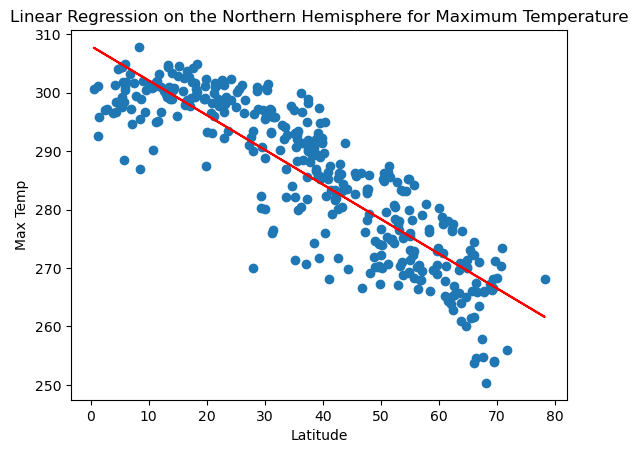

In [17]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Linear Regression on the Northern Hemisphere for Maximum Temperature", "Max Temp", (10,40))

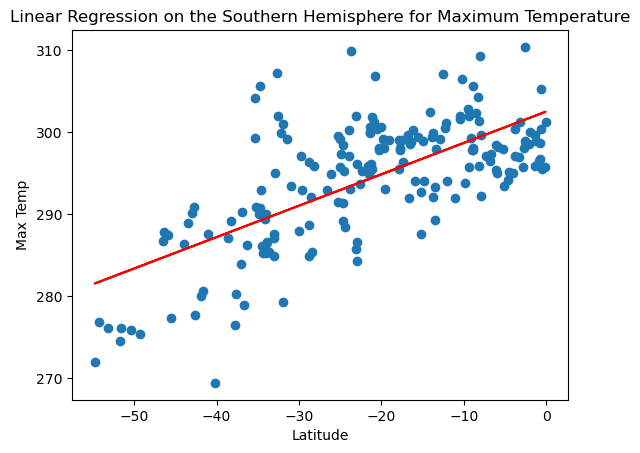

In [18]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Linear Regression on the Southern Hemisphere for Maximum Temperature", "Max Temp", (-50,90))

**Discussion about the linear relationship:** The observations are consistent with our understanding of global temperature patterns. The equatorial regions tend to be warmer due to the direct sun rays, while the poles are colder due to the slanting rays of the sun. 

### Humidity vs. Latitude Linear Regression Plot

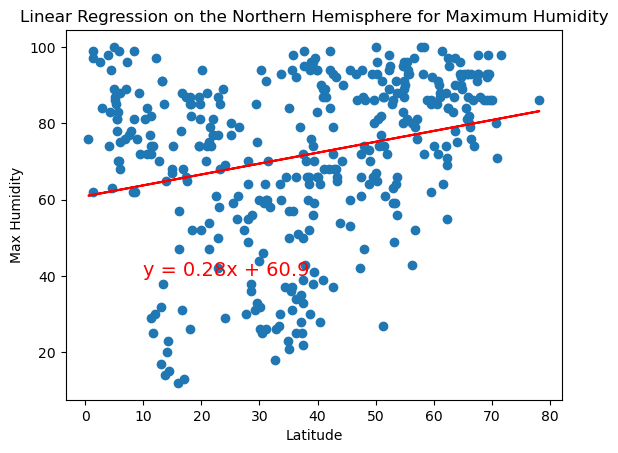

In [19]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Linear Regression on the Northern Hemisphere for Maximum Humidity", "Max Humidity", (10,40))

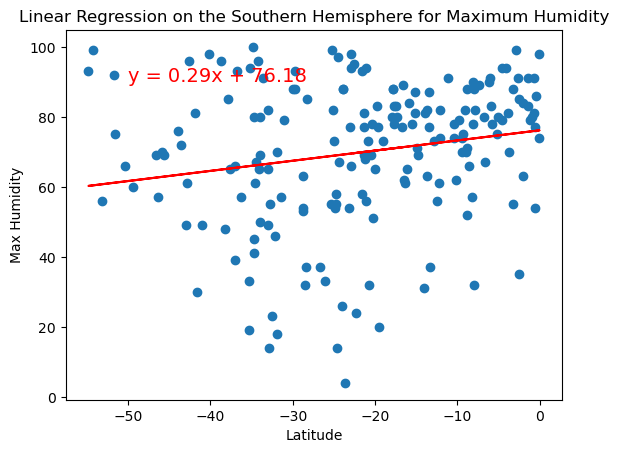

In [20]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Linear Regression on the Southern Hemisphere for Maximum Humidity", "Max Humidity", (-50,90))

**Discussion about the linear relationship:** Both doesn't show distinct patterns related to latitude. Humidity tends to be influenced by various factors such as proximity to oceans, currents, and local weather patterns, etc. 

### Cloudiness vs. Latitude Linear Regression Plot

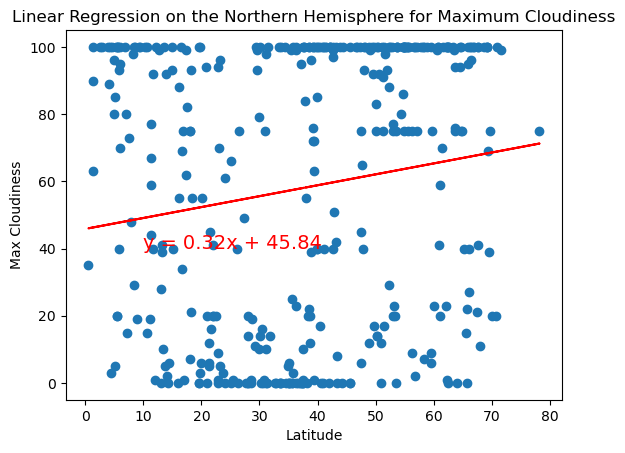

In [21]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Linear Regression on the Northern Hemisphere for Maximum Cloudiness", "Max Cloudiness", (10,40))

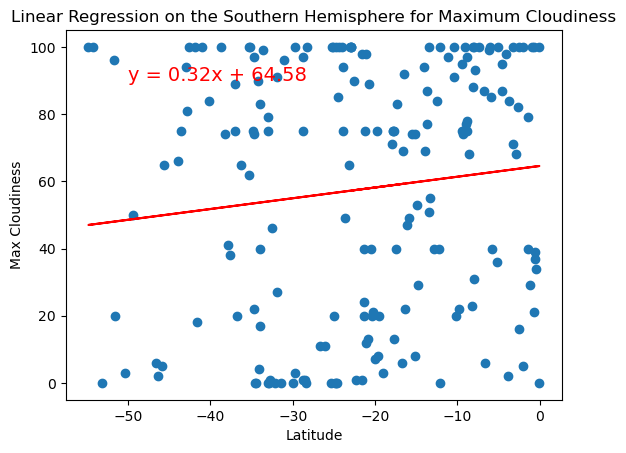

In [22]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Linear Regression on the Southern Hemisphere for Maximum Cloudiness", "Max Cloudiness", (-50,90))

**Discussion about the linear relationship:** Seems like cloudiness scattering all over for both hemisphere. Here, we need to consider the cloud formation usually influenced by multiple factors due to humidity, temperature, wind patterns and geographic figures.

### Wind Speed vs. Latitude Linear Regression Plot

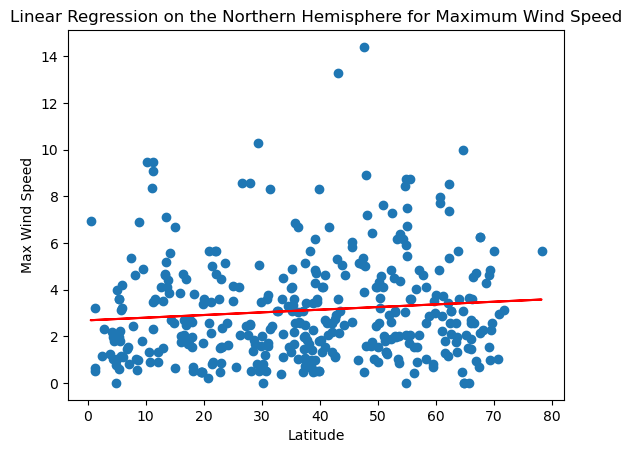

In [23]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Linear Regression on the Northern Hemisphere for Maximum Wind Speed", "Max Wind Speed", (10,40))

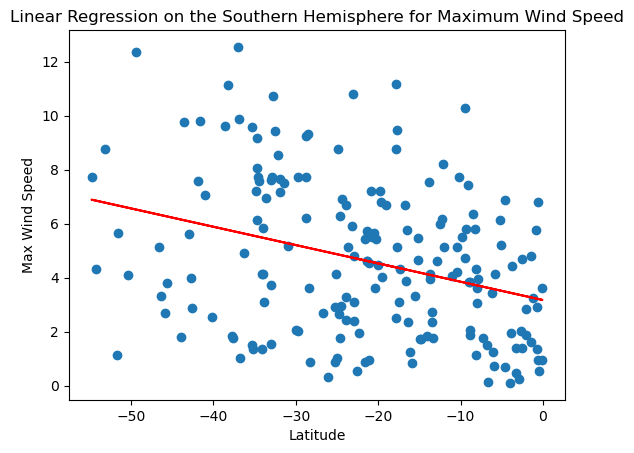

In [24]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Linear Regression on the Southern Hemisphere for Maximum Wind Speed", "Max Wind Speed", (-50,90))

**Discussion about the linear relationship:** Wind patterns seems to have stronger speed in the most northern part while the southern part remains stable. Seems like it also depands on the polar vortics, not solely dependent on latitude. 